# Introduction

Real estate is a profitable business in every economy worlwide. This is contrributed by a variety of factors such as the increase of the peoples population growth in majority of countries. In our dataset we will be looking at United states housing market which has changed drastically over the past decades. The real estate market in United states is among the competetitive industry.

Real estate plays a huge role in helping individuals, investors, real estate professional and policy makers make informed decisions concerning the sector.

The dataset we have been given contain alot of information on various aspects of the housing market. Analyzing the dataset will help in understanding the housing market in United states.

# Business Understanding

It is crucial for different group of people to understand the real estate market, this include real estate brokers, property investors, goverment organisations and financial institutions. The zillow dataset is useful in answering critical questions about housing trends, economic stability and investement opportunities.

The potential business in this dataset can be used in real estate investors can analyze the historical trends to identify regions with the highest potentials for returns on investment

# Problem Statement

The main goal of analyzing this dataset is to gain insights into the housing market trends in different regions of the United State over a span of several years.From the several factors our primary objective that we aim to achieve are:

> What have been the historical price trends in different places, and how they have changed over time?

> To determine which factors influence property value and to what extent.

> To use a time series analysis to predict the best areas to invest in based on their Return of Investment (ROI) between 1996 and 2018.

# Data Understanding

The data used in this project is a sample of the US real estate market collected from zillow housing data. The data includes median house prices from 1996 to 2018, as well as the regions where the residents are situated. The data also contains the city names and the metropolitan areas where the houses are located.
The data also has 14723 rows and 272 columns. The data will be melted for better analysis.

In [77]:
#Importing the necessary libraries
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# displaying all columns
pd.set_option("display.max_columns",None)

In [3]:
#Loading the dataset
df= pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [4]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [5]:
#displaying the last rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

In [6]:
#data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,14723.0,81075.010052,31934.118525,58196.0,67174.5,78007.0,90920.5,753844.0
RegionName,14723.0,48222.348706,29359.325439,1001.0,22101.5,46106.0,75205.5,99901.0
SizeRank,14723.0,7362.000000,4250.308342,1.0,3681.5,7362.0,11042.5,14723.0
1996-04,13684.0,118299.123063,86002.509608,11300.0,68800.0,99500.0,143200.0,3676700.0
1996-05,13684.0,118419.044139,86155.673905,11500.0,68900.0,99500.0,143300.0,3704200.0
...,...,...,...,...,...,...,...,...
2017-12,14723.0,281095.320247,367045.388033,14300.0,129900.0,193400.0,313400.0,18307100.0
2018-01,14723.0,282657.060382,369572.741938,14100.0,130600.0,194100.0,315100.0,18365900.0
2018-02,14723.0,284368.688447,371773.905107,13900.0,131050.0,195000.0,316850.0,18530400.0
2018-03,14723.0,286511.376757,372461.234695,13800.0,131950.0,196700.0,318850.0,18337700.0


In [7]:
#checking the data columns
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [8]:
# Description of the columns
columns = {'Columns': ['RegionID','RegionName','City','State','Metro','County Name','Size Rank','Date Columns (265 Columns)'],
'Description':['Unique region identifier','Names of the Regions (Zipcodes)','City names for the regions',
               'Names of the states','Names of metropolitan areas','Names of counties','Rank of Zipcodes by urbanization',
              'Median house prices across the years']}
pd.DataFrame(columns)

,Columns,Description
0,RegionID,Unique region identifier
1,RegionName,Names of the Regions (Zipcodes)
2,City,City names for the regions
3,State,Names of the states
4,Metro,Names of metropolitan areas
5,County Name,Names of counties
6,Size Rank,Rank of Zipcodes by urbanization
7,Date Columns (265 Columns),Median house prices across the years


# Data Preparation

This is a crucial step in housing data analysis as it will enhance the efficiency of our models. It involves handling the missing values, checking the duplicates, feature selection and handling outliers.

In [9]:
# checking for duplicates
print(f'Duplicates in the dataset:{df.duplicated().sum()}')

Duplicates in the dataset:0


In [10]:
#checking for the missing values
df.isna().sum()/ len(df)*100

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         7.084154
                ...   
2017-12       0.000000
2018-01       0.000000
2018-02       0.000000
2018-03       0.000000
2018-04       0.000000
Length: 272, dtype: float64

In [11]:
#filling Metro missing values with Uknown
df['Metro'].fillna('Unknown', inplace= True)

In [12]:
#Rechechecking if their are any missing columns in metro
df.isna().sum()/ len(df)*100

RegionID      0.0
RegionName    0.0
City          0.0
State         0.0
Metro         0.0
             ... 
2017-12       0.0
2018-01       0.0
2018-02       0.0
2018-03       0.0
2018-04       0.0
Length: 272, dtype: float64

In [13]:
#Summary of the column names
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [14]:
#checking the data type
df.SizeRank.value_counts().value_counts()

count
1    14723
Name: count, dtype: int64

In [15]:
#Checking th data type
df.RegionName.value_counts().value_counts()

count
1    14723
Name: count, dtype: int64

In [16]:
#Rename the regionname and changing the datatype 
df.rename(columns={'RegionName':'Zipcode'}, inplace=True)
df.Zipcode = df.Zipcode.astype('string')
print(df.Zipcode)

0        60657
1        75070
2        77494
3        60614
4        79936
         ...  
14718     1338
14719     3293
14720    40404
14721    81225
14722    89155
Name: Zipcode, Length: 14723, dtype: string


In [17]:
#changing the datatype
df.SizeRank = df.SizeRank.astype('string')
print(df.SizeRank)

0            1
1            2
2            3
3            4
4            5
         ...  
14718    14719
14719    14720
14720    14721
14721    14722
14722    14723
Name: SizeRank, Length: 14723, dtype: string


Creating Return on Investment Column and coverting the data to Time Series.

In [18]:
# Return On Investment column
df['22yr_ROI']=((df['2018-04'] - df['1996-04'])/ df['1996-04']) 
df['10yr_ROI']=((df['2018-04'] - df['2008-04'])/ df['2008-04']) 

#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)
df['10yr_std'] = df.loc[:, "2008-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)
df["10yr_mean"] = df.loc[:, "2008-04":"2018-04"].mean(skipna=True, axis=1)
# calculating and creating a new column - CV

df["22yr_CV"] = df['std']/df["mean"]
df["10yr_CV"] = df['10yr_std']/df["10yr_mean"]


In [19]:
# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean", "10yr_std", "10yr_mean"], inplace=True, axis=1)

In [20]:
df.columns

Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '22yr_ROI', '10yr_ROI', '22yr_CV', '10yr_CV'],
      dtype='object', length=276)

In [21]:
data = df.copy()

In [22]:
def melt_df(df):
    # Assuming 'Date' is the correct column name for date information
    melt = pd.melt(df, id_vars=['Zipcode', 'RegionID', 'State', 'Metro', 'SizeRank', 'CountyName', '22yr_ROI', '10yr_ROI', '22yr_CV', '10yr_CV'], var_name='Date', value_name='value')
    
    # Ensure the 'Date' column is converted to datetime format
    melt['Date'] = pd.to_datetime(melt['Date'], errors='coerce',format='%Y-%m' )  # Use 'coerce' to handle invalid dates
    
    # Drop rows with missing date values (if any)
    melt = melt.dropna(subset=['Date','value'])  # Ensure 'Date' and 'value' columns are present
    return melt

In [23]:
data = melt_df(data)

In [24]:
data.head(10)

,Zipcode,RegionID,State,Metro,SizeRank,CountyName,22yr_ROI,10yr_ROI,22yr_CV,10yr_CV,Date,value
14723,60657,84654,IL,Chicago,1,Cook,2.083782,0.191307,0.256487,0.111514,1996-04-01,334200.0
14724,75070,90668,TX,Dallas-Fort Worth,2,Collin,0.365295,0.523674,0.152680,0.175985,1996-04-01,235700.0
14725,77494,91982,TX,Houston,3,Harris,0.567966,0.322244,0.143950,0.117473,1996-04-01,210400.0
14726,60614,84616,IL,Chicago,4,Cook,1.623971,0.142383,0.237364,0.117081,1996-04-01,498100.0
14727,79936,93144,TX,El Paso,5,El Paso,0.571798,-0.053001,0.178326,0.030683,1996-04-01,77300.0
14728,77084,91733,TX,Houston,6,Harris,0.729474,0.277605,0.142279,0.126362,1996-04-01,95000.0
14729,10467,61807,NY,New York,7,Bronx,1.733159,0.049209,0.293150,0.100164,1996-04-01,152900.0
14730,60640,84640,IL,Chicago,8,Cook,2.615704,0.123421,0.302850,0.114519,1996-04-01,216500.0
14731,77449,91940,TX,Houston,9,Harris,0.846960,0.316891,0.147026,0.141929,1996-04-01,95400.0
14732,94109,97564,CA,San Francisco,10,San Francisco,3.978460,0.465998,0.342868,0.182253,1996-04-01,766000.0


In [25]:
data.tail(10)

,Zipcode,RegionID,State,Metro,SizeRank,CountyName,22yr_ROI,10yr_ROI,22yr_CV,10yr_CV,Date,value
3916308,3765,59187,NH,Claremont,14714,Grafton,0.577970,-0.061119,0.224286,0.053144,2018-04-01,127500
3916309,84781,94711,UT,St. George,14715,Washington,0.963208,-0.020198,0.205629,0.112438,2018-04-01,266800
3916310,12429,62556,NY,Kingston,14716,Ulster,1.266922,-0.107143,0.299700,0.079281,2018-04-01,177500
3916311,97028,99032,OR,Portland,14717,Clackamas,1.564611,-0.022937,0.388086,0.106849,2018-04-01,349300
3916312,12720,62697,NY,Unknown,14718,Sullivan,0.883200,-0.268035,0.297000,0.107917,2018-04-01,117700
3916313,1338,58333,MA,Greenfield Town,14719,Franklin,1.212474,0.058140,0.232707,0.061037,2018-04-01,209300
3916314,3293,59107,NH,Claremont,14720,Grafton,1.435814,-0.005724,0.303073,0.070133,2018-04-01,225800
3916315,40404,75672,KY,Richmond,14721,Madison,1.336252,0.292636,0.182705,0.069886,2018-04-01,133400
3916316,81225,93733,CO,Unknown,14722,Gunnison,2.476714,0.040238,0.282105,0.098244,2018-04-01,664400
3916317,89155,95851,NV,Las Vegas,14723,Clark,1.024943,0.048430,0.310044,0.179319,2018-04-01,357200


# Exploratory Data Analysis

The data will analysed to determine various aspects. This include for example the impact urbanisation have on median house prices or the top ten zipcodes with highest ROI and greatest price volatility.

In [26]:
#summary 
data.describe()

,RegionID,22yr_ROI,10yr_ROI,22yr_CV,10yr_CV,Date
count,3.744704e+06,3.626260e+06,3.695702e+06,3.744704e+06,3.744704e+06,3744704
mean,8.101695e+04,1.325605e+00,1.462351e-01,2.247378e-01,1.107991e-01,2007-06-05 09:14:03.302968576
min,5.819600e+04,-5.326087e-01,-5.565217e-01,1.933035e-02,6.983217e-03,1996-04-01 00:00:00
25%,6.695300e+04,7.856907e-01,6.027122e-03,1.618824e-01,6.476632e-02,2001-12-01 00:00:00
50%,7.792000e+04,1.139484e+00,1.272523e-01,2.202396e-01,9.400478e-02,2007-07-01 00:00:00
75%,9.104500e+04,1.619833e+00,2.540395e-01,2.800427e-01,1.438490e-01,2013-01-01 00:00:00
max,7.538440e+05,1.118994e+01,1.664748e+00,6.975408e-01,4.269918e-01,2018-04-01 00:00:00
std,3.225436e+04,8.659875e-01,2.150884e-01,8.216603e-02,6.155055e-02,NaN


### Univariate Analysis

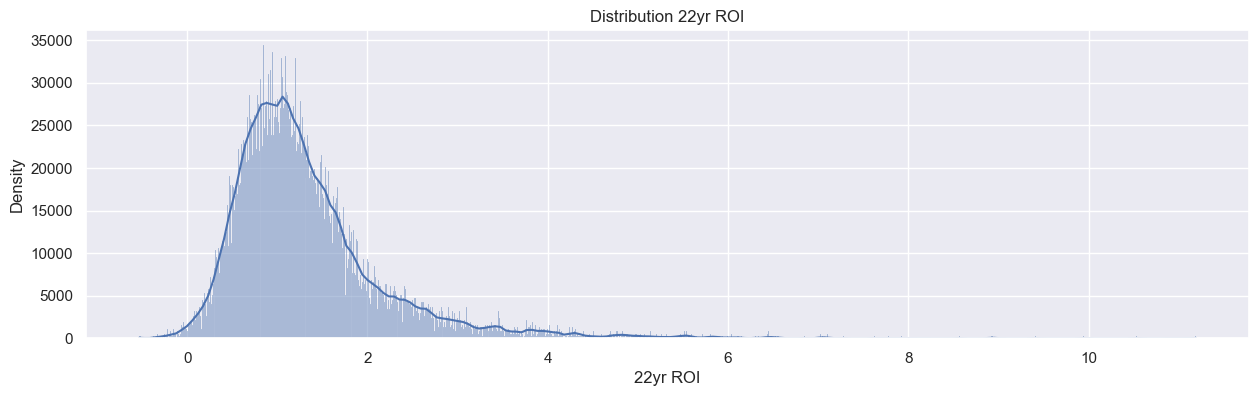

In [27]:
#Create a  histogram of home values
plt.figure(figsize=(15,4))
sns.histplot(data['22yr_ROI'],kde=True)
plt.title('Distribution 22yr ROI')
plt.ylabel('Density')
plt.xlabel('22yr ROI')
plt.show()

The value column has a long tail this indicates outliers, this will give us insight on the highly priced houses.

### Bivariate  Analysis

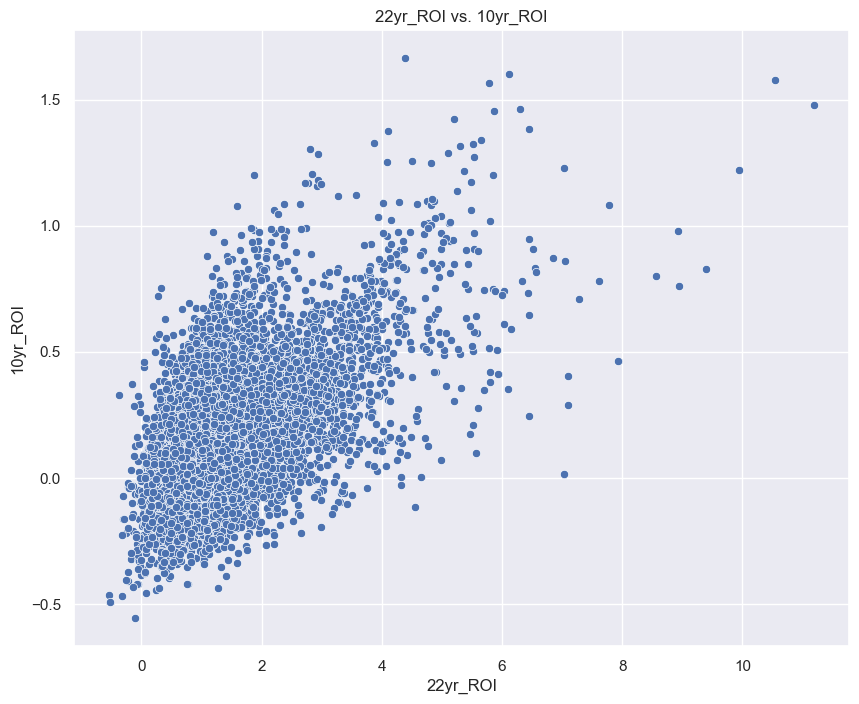

In [28]:
#scatter plot to visualize the relationship between '22yr_ROI' and '10yr_ROI'
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='22yr_ROI', y='10yr_ROI')
plt.title('22yr_ROI vs. 10yr_ROI')
plt.xlabel('22yr_ROI')
plt.ylabel('10yr_ROI')
plt.show()

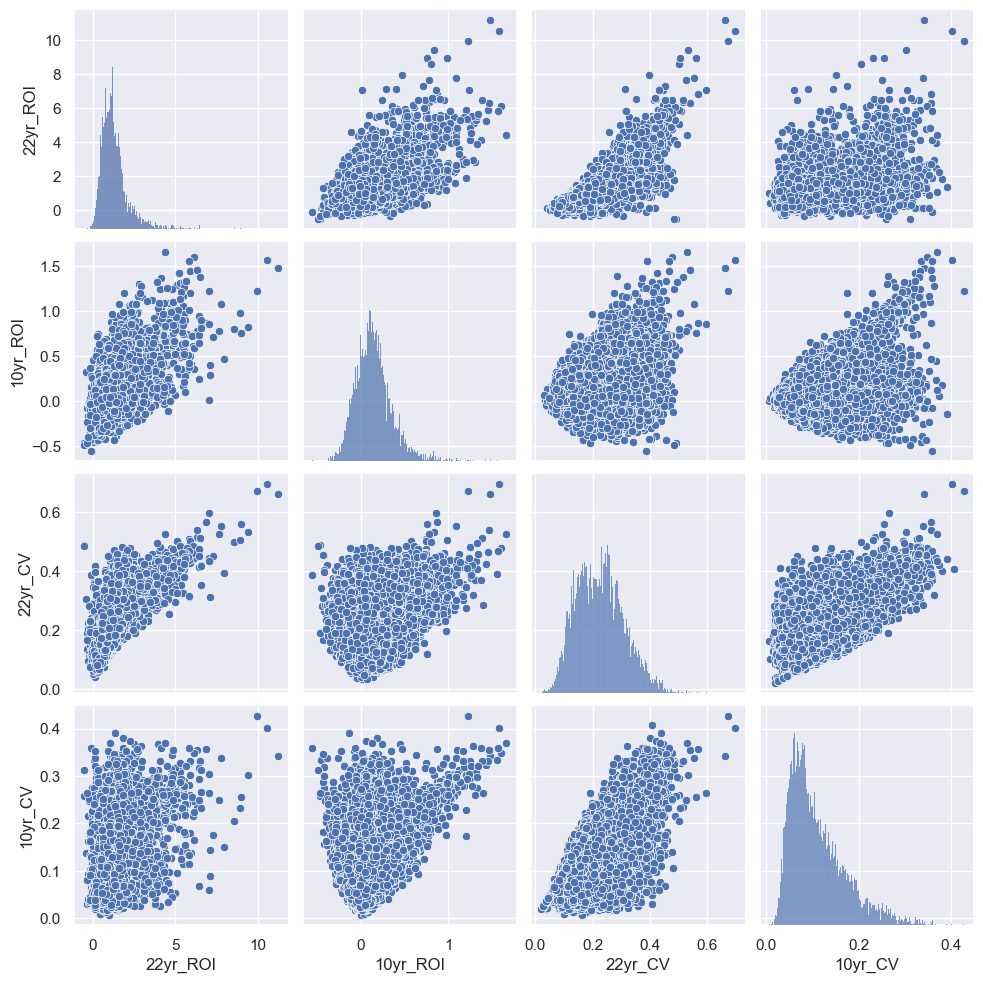

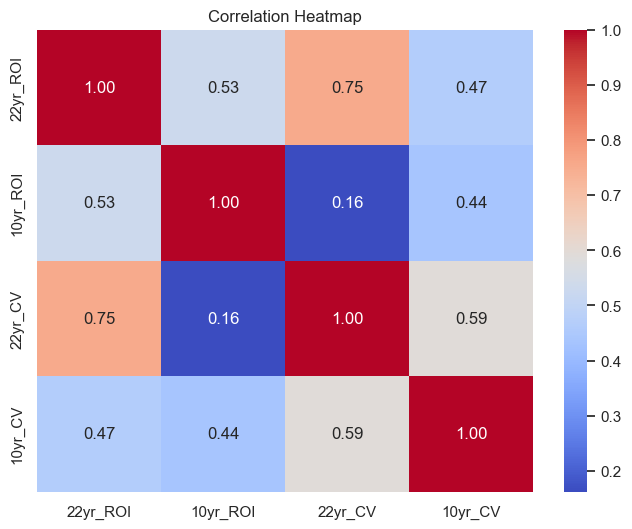

In [29]:
# Pairplot to visualize pairwise relationships
sns.pairplot(data[['22yr_ROI', '10yr_ROI', '22yr_CV', '10yr_CV']])

# Heatmap to visualize the correlation between variables
correlation_matrix = data[['22yr_ROI', '10yr_ROI', '22yr_CV', '10yr_CV']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In multivariate we are looking at relationships between different features.

### Time Series EDA

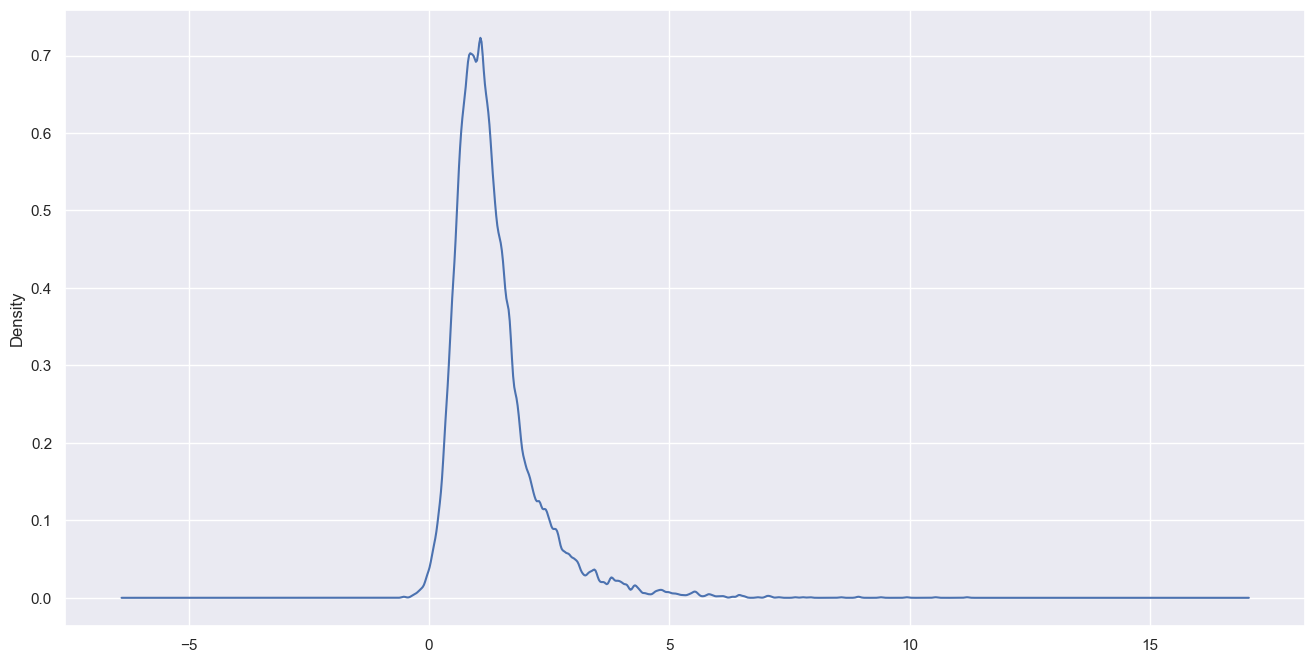

In [30]:
# plot a density plot for the data
data['22yr_ROI'].plot(figsize = (16,8),kind='kde');

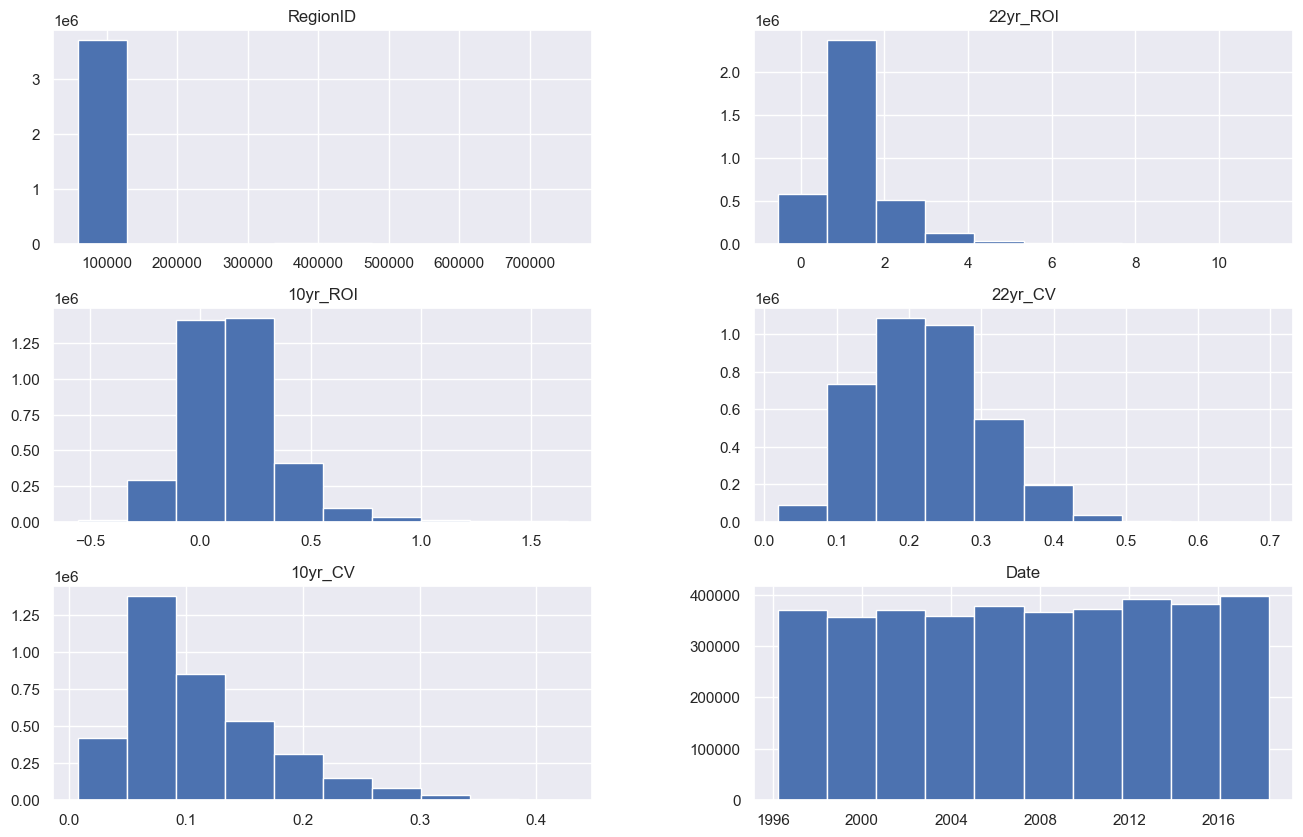

In [31]:
# Draw a histogram plot using data 
data.hist(figsize = (16,10));

According to the graph there seems to be an increase over the years in the data

In [32]:
column_names = data.columns
print(column_names)

Index(['Zipcode', 'RegionID', 'State', 'Metro', 'SizeRank', 'CountyName',
       '22yr_ROI', '10yr_ROI', '22yr_CV', '10yr_CV', 'Date', 'value'],
      dtype='object')


In [45]:
data['RegionID'].tail()

3916313    58333
3916314    59107
3916315    75672
3916316    93733
3916317    95851
Name: RegionID, dtype: int64

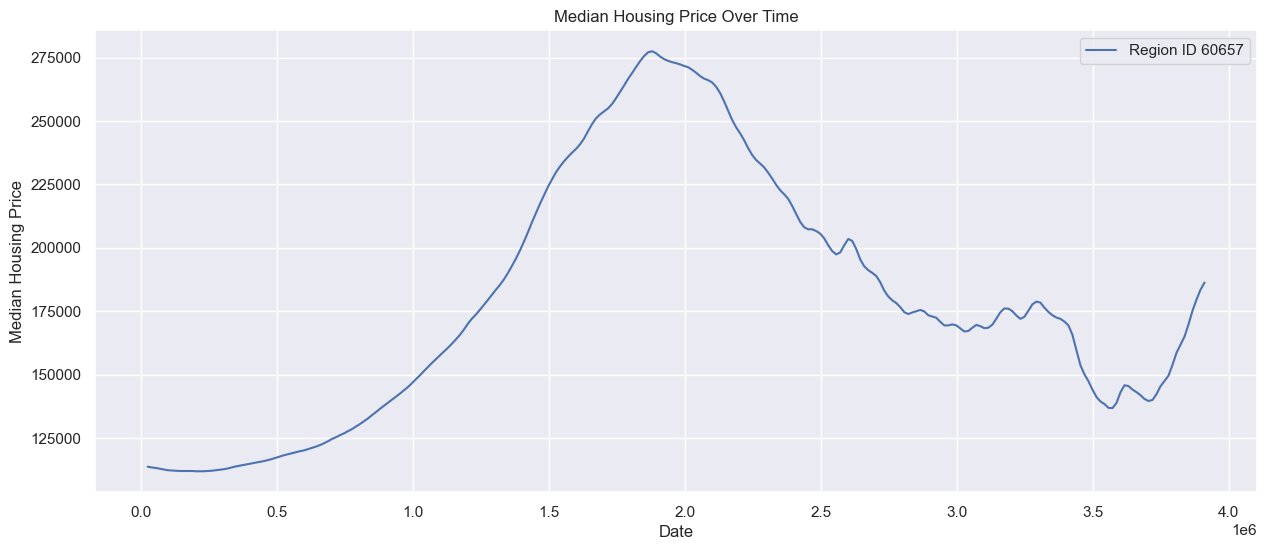

In [71]:
# Plot time series data using the region id
region_id = 60657  
region_data = data[data['RegionID'] == region_id]
plt.figure(figsize=(15, 6))
plt.plot(region_data.index, region_data['value'], label=f'Region ID {region_id}')
plt.xlabel('Date')
plt.ylabel('Median Housing Price')
plt.title('Median Housing Price Over Time')
plt.legend()
plt.show()

The median house price of region '60657' is not stationary

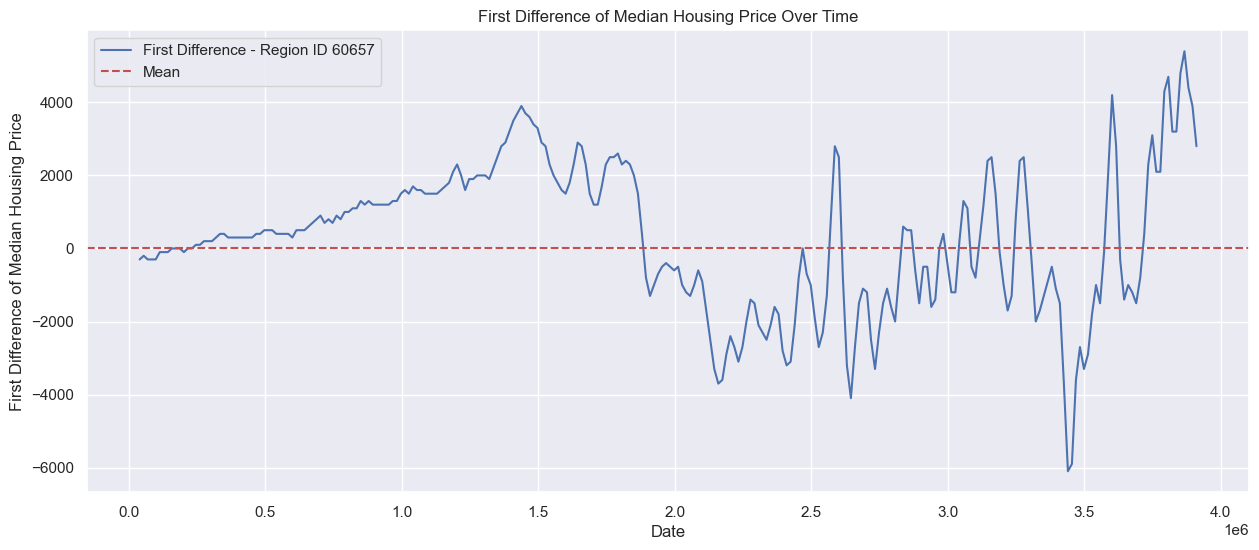

In [38]:
# Plot time series data using region id
region_id = 60657  
region_data = data[data['RegionID'] == region_id]

# Calculate first-order differences
region_data['first_difference'] = region_data['value'] - region_data['value'].shift(1)

plt.figure(figsize=(15, 6))
plt.plot(region_data.index, region_data['first_difference'], label=f'First Difference - Region ID {region_id}')
plt.axhline(y=0, color='r', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('First Difference of Median Housing Price')
plt.title('First Difference of Median Housing Price Over Time')
plt.legend()
plt.show()

In [51]:
import statsmodels.api as sm

# Extract the differenced data for Region 60657
region_data = data[data['RegionID'] == 60657]
differenced_data = region_data['value'].diff().dropna()  # Assuming you've already differenced the data

# Perform the Augmented Dickey-Fuller test
result = sm.tsa.adfuller(differenced_data)

# Print the test result
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

# Interpret the results
if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is not stationary (fail to reject the null hypothesis)")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.7054986678998763
P-value: 0.4282816478699469
Critical Values:
  1%: -3.457105309726321
  5%: -2.873313676101283
  10%: -2.5730443824681606
The time series is not stationary (fail to reject the null hypothesis)


The Augmented Dickey-Fuller (ADF) test results indicate that the time series for Region 60657 is not stationary, as the p-value (0.428) is greater than the common significance level of 0.05. The time series has a unit root and is non-stationary.

### Time Series Decomposition

The decomposition of the time series will help understand better the underlying patterns , trends and seasionality present in region 60657 data. 

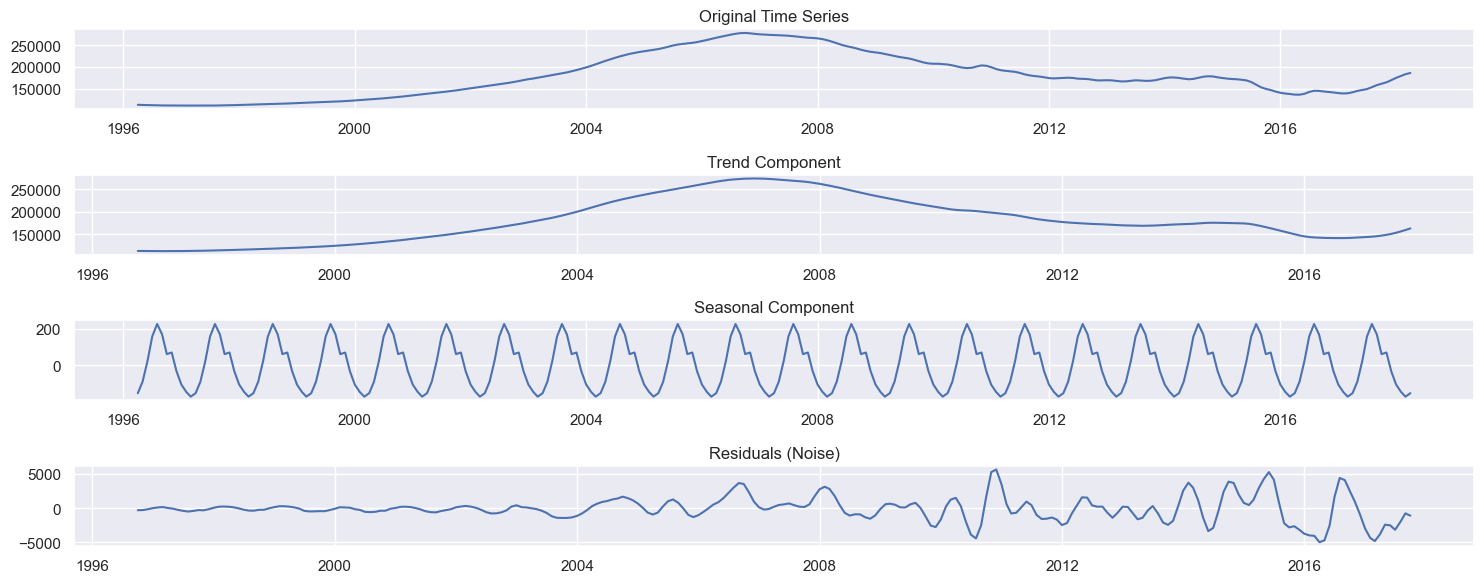

In [70]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(region_data['value'], model='additive', period=12)  # Assuming yearly seasonality (period=12)

# Plot the original time series
plt.figure(figsize=(15, 6))
plt.subplot(411)
plt.plot(region_data.index, region_data['value'], label='Original')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')

# Plot the residuals (noise)
plt.subplot(414)
plt.plot(decomposition.resid.index, decomposition.resid, label='Residuals')
plt.title('Residuals (Noise)')

plt.tight_layout()
plt.show()

Augmented Dickey-Fuller Test Results for Detrended Series:
ADF Statistic: -2.4666281280616027
P-value: 0.12380660552711287
Critical Values:
  1%: -3.458128284586202
  5%: -2.873761835239286
  10%: -2.5732834559706235


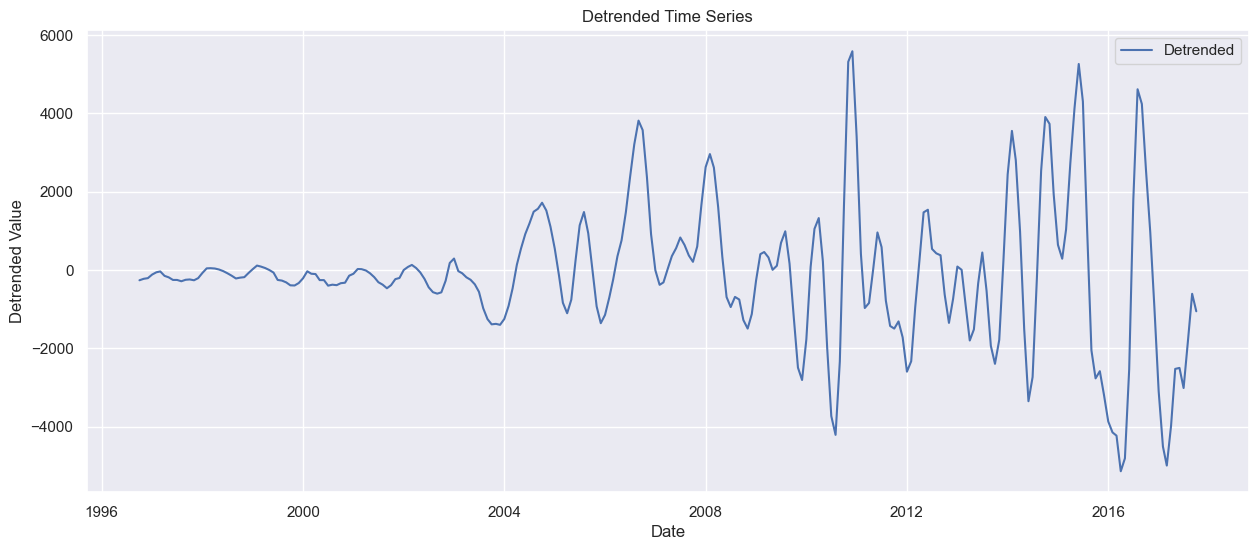

The detrended time series is not stationary (fail to reject the null hypothesis)


In [68]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(region_data['value'], model='additive', period=12)  # Assuming yearly seasonality (period=12)

# Detrend the time series by subtracting the trend component
detrended_series = region_data['value'] - decomposition.trend

# Perform Augmented Dickey-Fuller test on the detrended series
adf_result = adfuller(detrended_series.dropna())  # Drop NaN values if any

# Display the ADF test results
print("Augmented Dickey-Fuller Test Results for Detrended Series:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value}")

# Plot the detrended time series
plt.figure(figsize=(15, 6))
plt.plot(detrended_series.index, detrended_series, label='Detrended')
plt.title('Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Detrended Value')
plt.legend()
plt.show()

# Interpret the ADF test results
if adf_result[1] <= 0.05:
    print("The detrended time series is stationary (reject the null hypothesis)")
else:
    print("The detrended time series is not stationary (fail to reject the null hypothesis)")

In [61]:
# First-order differencing
differenced_series = detrended_series.diff().dropna()

In [63]:
# First-order differencing
differenced_series = detrended_series.diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced series
adf_result = adfuller(differenced_series)

# Display the ADF test results
print("Augmented Dickey-Fuller Test Results for Differenced Series:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value}")

# Interpret the ADF test results
if adf_result[1] <= 0.05:
    print("The detrended time series is stationary (reject the null hypothesis)")
else:
    print("The detrended time series is not stationary (fail to reject the null hypothesis)")

Augmented Dickey-Fuller Test Results for Differenced Series:
ADF Statistic: -7.839191714550212
P-value: 6.00043814883819e-12
Critical Values:
  1%: -3.458128284586202
  5%: -2.873761835239286
  10%: -2.5732834559706235
The detrended time series is stationary (reject the null hypothesis)


### Time Series Modeling

MA Model

In [115]:
#convert to numeric
differenced_series = pd.to_numeric(differenced_series, errors='coerce')
# Fit an ARMA model
model_1 = ARIMA(differenced_series, order=(0,0,1))
ma = model_1.fit()

# Print out summary information on the fit
print(ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1979.021
Date:                Sun, 17 Sep 2023   AIC                           3964.041
Time:                        08:36:59   BIC                           3974.629
Sample:                    11-01-1996   HQIC                          3968.302
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3995     75.284     -0.045      0.964    -150.954     144.155
ma.L1          0.8757      0.030     29.128      0.000       0.817       0.935
sigma2      3.857e+05   2.03e+04     19.047      0.0

The model will be further diagnosed because AIC and BIC test need more attention.We will investigate the model further  with AR model.

AR Model

In [114]:
# Fit an AR model with order (1, 0, 0)
model_2 = ARIMA(differenced_series, order=(1, 0, 0))
ar = model_2.fit()

# Print out summary information on the fit
print(ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2019.763
Date:                Sun, 17 Sep 2023   AIC                           4045.527
Time:                        08:36:40   BIC                           4056.115
Sample:                    11-01-1996   HQIC                          4049.787
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1415    141.783     -0.022      0.982    -281.031     274.748
ar.L1          0.6649      0.031     21.294      0.000       0.604       0.726
sigma2      5.369e+05   3.08e+04     17.449      0.0

The BIC and AIC seems to have slightly improved

ARMA model

In [116]:
# Fit an ARMA model
model_3 = ARIMA(differenced_series, order=(1,0,1))
arma = model_3.fit()

# Print out summary information on the fit
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1946.077
Date:                Sun, 17 Sep 2023   AIC                           3900.153
Time:                        08:37:25   BIC                           3914.271
Sample:                    11-01-1996   HQIC                          3905.834
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3712    129.250     -0.026      0.979    -256.697     249.955
ar.L1          0.5224      0.035     14.883      0.000       0.454       0.591
ma.L1          0.7535      0.035     21.325      0.0

Model 3 has a lower AIC and BIC values.

ARIMA Model.

In [90]:
# Fit an ARIMA model
model_4 = ARIMA(differenced_series, order=(1,1,1))
arima = model_4.fit()
# Print out summary information on the fit
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1967.821
Date:                Sun, 17 Sep 2023   AIC                           3941.641
Time:                        07:35:09   BIC                           3952.218
Sample:                    11-01-1996   HQIC                          3945.897
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2068      0.076      2.735      0.006       0.059       0.355
ma.L1          0.6196      0.058     10.667      0.000       0.506       0.733
sigma2       3.77e+05   2.02e+04     18.692      0.0

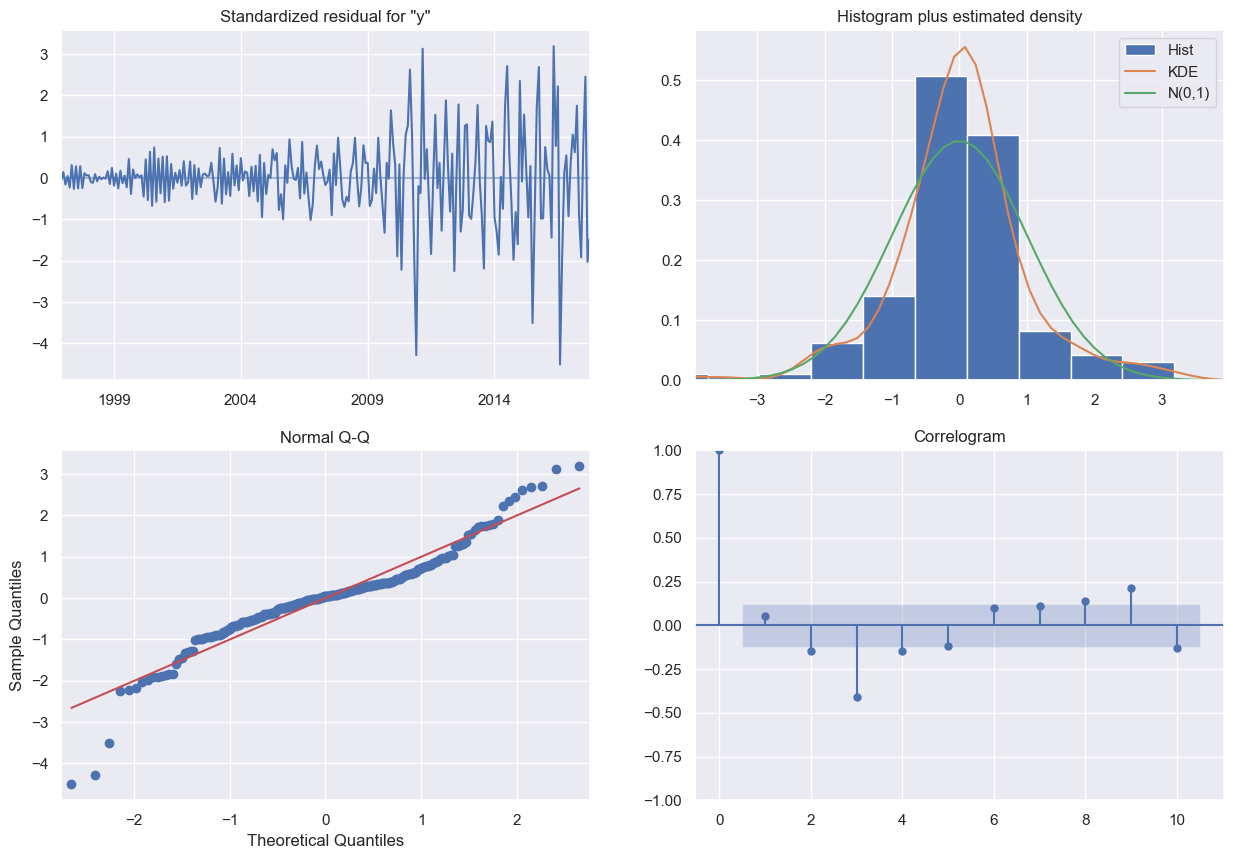

In [101]:
arima.plot_diagnostics(figsize=(15,10))
plt.show()

In [113]:
# Getting a forecast for the next 12 months according to our dataset.
forecast = arima.get_forecast(12)
prediction = forecast.conf_int()
prediction['Price'] = forecast.predicted_mean
prediction.columns = ['lower','upper','prediction'] 
prediction.head()

,lower,upper,prediction
2017-11-01,-2553.233225,-146.305929,-1349.769577
2017-12-01,-4042.527330,969.208776,-1536.659277
2018-01-01,-5047.555672,1896.957861,-1575.298905
2018-02-01,-5830.630772,2664.055400,-1583.287686
2018-03-01,-6490.686514,3320.807766,-1584.939374
